## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction


In this project, we will be working to understand the results of an A/B test run by an e-commerce website.  our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [60]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [61]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [62]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [63]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [64]:
df.query('converted == 1').user_id.nunique( ) / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [65]:
df_dl = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].count() + df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')].count()

df_dl

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [66]:
df_dl.head()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Store your new dataframe in **df2**.

In [68]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) | ((df['group'] == 'control') & (df['landing_page'] == 'old_page')) ]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [69]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Let's Use **df2** and solve the below questions

a. How many unique **user_id**s are in **df2**?

In [70]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [71]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [72]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [73]:
df2 = df2.drop(df2.index[2893])

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [75]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` 

a. What is the probability of an individual converting regardless of the page they receive?

In [76]:
df2.query('converted == 1').user_id.nunique()  / df2.user_id.count()



0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [77]:
df_ctrl = df2[((df2['group'] == 'control') & (df2['converted'] == 1))].user_id.count() / df2[((df2['group'] == 'control'))].user_id.count() 
df_ctrl

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [78]:
df_treat = df2[((df2['group'] == 'treatment') & (df2['converted'] == 1))].user_id.count() / df2[((df2['group'] == 'treatment'))].user_id.count()
df_treat

0.11880806551510564

In [79]:
Actual_Diff =  df_treat -df_ctrl 
Actual_Diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [80]:
df2.query('landing_page == "new_page"').user_id.nunique()  / df2.user_id.count()

0.50005850287696496

e. Let's use the results in the previous two portions of this question to suggest if we can think there is evidence that one page leads to more conversions? 

The Probablity of Old Page Conversion = 12%
The Probabity of New Page Conversion = 11.8%

we fail to prove that there is such a significant evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do we run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider we need to make the decision just based on all the data provided.  If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be null and alternative hypotheses be?  we can state wer hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: Pnew <= Pold
H1: Pnew > Pold

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Let's Use the cells below to provide the necessary parts of this simulation.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [81]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [82]:
Pnew = df2.query('converted == 1').user_id.nunique()  / df2.user_id.count()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [83]:
Pold = df2.query('converted == 1').user_id.nunique()  / df2.user_id.count()
Pold

0.11959708724499628

c. What is $n_{new}$?

In [84]:
Nnew = df2.query('landing_page == "new_page"').user_id.count()
Nnew

145310

d. What is $n_{old}$?

In [85]:
Nold = df2.query('landing_page == "old_page"').user_id.count()
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [86]:
new_page_converted = np.random.binomial(1,Pnew,Nnew)
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [87]:
old_page_converted = np.random.binomial(1,Pold,Nold)
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [88]:
Pdiff = (sum(new_page_converted == 1) / Nnew) - (sum(old_page_converted == 1) / Nold)
Pdiff

0.0004314301947883209

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [31]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,Pnew,Nnew)
    old_page_converted = np.random.binomial(1,Pold,Nold)
    p_diff_sim = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff_sim)
    
p_diffs

[0.0015188153014080857,
 -0.0015577452469728997,
 0.0014637281887232706,
 0.00080295228526594542,
 0.00060348469233120761,
 -0.00017420402408327429,
 0.00093397326100211342,
 3.2430204786534911e-05,
 -2.1512319123007106e-06,
 0.0020283629932262015,
 -0.00091067844926936981,
 -0.0022046670880647018,
 -0.0013302506247613449,
 0.00082384678604573158,
 -9.8645342850520179e-05,
 0.00099591151582002768,
 -0.0019566514415200326,
 -0.0021977699008902396,
 -0.0011720467788401551,
 -0.0025760680971372296,
 -0.0010071179883066883,
 0.00013529113223749445,
 -0.0002157559789483926,
 -0.00060754669871752875,
 -0.0011513927354986492,
 0.0012920744535774992,
 0.00031458218596346066,
 3.918243534926924e-05,
 -0.00022904044709841365,
 0.0015809172719286474,
 -0.00029114753373470081,
 0.00076869998534431772,
 0.0013950257657392856,
 0.00062444911335900188,
 0.0009961315087954753,
 -0.00030507151634820429,
 -0.0014059406196306051,
 0.0022346646745750043,
 0.0016085844677340144,
 3.9284757663446412e-05,
 0

In [32]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**. 

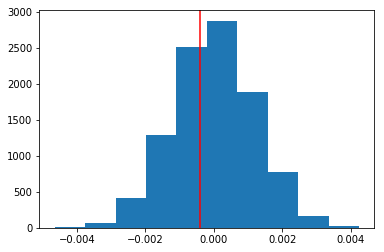

In [33]:
plt.hist(p_diffs); #sampling distribution
plt.axvline(x=Pdiff,color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
(p_diffs > Actual_Diff).mean()

0.90959999999999996

k. In words, explain what we just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In the above one-tailed test,P-value tell us it is "likely" that we would observe such an stasitic in the direction of H0 if the null hypothesis is true.Therefore our initial assumption that the null hypothesis is true and must be correct

That is, since the P-value is more than α = 0.05, we fail to reject the null hypothesis H0: Pnew <= Pold in favor of the alternative hypothesis H1: Pnew > Pold

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [89]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [90]:
import statsmodels.api as sm

convert_old = df2[(df2['group'] == 'control') & (df2['converted'] == 1)]['user_id'].count()
convert_new = df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)]['user_id'].count()


In [91]:
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value. 

In [92]:
z_Score,p_score = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')

z_Score

1.3109241984234394

In [93]:
p_score

0.90505831275902449

In [94]:
from scipy.stats import norm

norm.ppf(1-(0.05))  # z score for 95% level of confidence

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

         Since the z-score of 1.31 doesnt exceed the critical value of 1.64, we fail to reject Null Hypothesis ie) there is no significant diifference between old and new page conversions.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result we acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model we specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, we first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [95]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [96]:
df2['intercept'] = 1

df2[['ab_page','old_page']] = pd.get_dummies(df['landing_page'])

df2 = df2.drop('old_page',axis=1)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import our regression model.  Instantiate the model, and fit the model using the two columns we created in part **b.** to predict whether or not an individual converts.

In [97]:
logit_mod = sm.Logit(df2['ab_page'],df2[['intercept','converted']])

d. Provide the summary of our model below, and use it as necessary to answer the following questions.

In [98]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.752584
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Apr 2018   Pseudo R-squ.:                 -0.1108
Time:                        05:31:20   Log-Likelihood:            -2.1869e+05
converged:                       True   LL-Null:                   -1.9688e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      0.004      0.516      0.606      -0.006       0.010
converted     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [99]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value we found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P-value of ab_page is 0.190.
  The reason why p-score differs from previous section is because the p-value we calculate for the bootstrap is ~.9 because we are asking the question, how many differences under the null are greater than our observed diff, but if we reverse the question it becomes ~.1, e.g., if we look at the proportion of null diffs less than the obs diff.

f. Now, we are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into our regression model.  Are there any disadvantages to adding additional terms into your regression model?

I will say we should use the right amount of predictors to get most presice estimates.Becoz taking very few predictors may result in produce biased estimates also taking more predictors may lead to less presice estimates.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. we will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.

Does it appear that country had an impact on conversion?  we need to create dummy variables for these country columns -  Provide the statistical output as well as a written response to answer this question.

In [100]:
#caller.join(other, lsuffix='_caller', rsuffix='_other')

df3 = pd.read_csv('countries.csv')
#df3.set_index('user_id', inplace=True)
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [101]:
df2.head()
df2 = df2.set_index('user_id').join(df3.set_index('user_id'))

In [102]:
df2.head(2)

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US


In [103]:
df2['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [104]:
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])

df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1


In [105]:
con_logit = sm.Logit(df2['ab_page'],df2[['intercept','converted','UK','US']])

result = con_logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.825077
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 13 Apr 2018   Pseudo R-squ.:                 -0.2178
Time:                        05:31:33   Log-Likelihood:            -2.3975e+05
converged:                       True   LL-Null:                   -1.9688e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0159      0.017      0.956      0.339      -0.017       0.049
converted     -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0211      0.018     -1.162      0.245      -0.057       0.015
US            -0.0123      0.017     -0.716      0.474      -0.046       0.021
==============================================================================
"""

In [106]:
#UK
1/np.exp(-0.0211)

#For a unit decrease in UK,ab_page is 1.02 times likely holding all else is constant

1.0213241789489729

In [107]:
#US
1/np.exp(-0.0123)

#For a unit decrease in US,ab_page is 1.01 times likely holding all else is constant

1.0123759561005452

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  let
s create the necessary additional columns, and fit the new model.  

Provide the summary results, and our conclusions based on the results.

In [108]:
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1


In [109]:
#joined_data['UK_ind_ab_page'] = joined_data['UK_ind']*joined_data['ab_page']

df2['UK_abpage'] = df2['UK'] * df2['ab_page']

In [110]:
df2['US_abpage'] = df2['US'] * df2['ab_page']

In [111]:
df2['CA_abpage'] = df2['CA'] * df2['ab_page']

In [114]:
df2.head(2)

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_abpage,US_abpage,CA_abpage
user_id,,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1,0,1,0
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1,0,1,0


In [115]:
page_logit = sm.Logit(df2['converted'],df2[['intercept','UK_abpage','US_abpage']])

result = page_logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Apr 2018   Pseudo R-squ.:               1.082e-05
Time:                        05:33:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_abpage      0.0112      0.018      0.626      0.532      -0.024       0.046
US_abpage     -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

In [ ]:
#yes, there are small differences in the conversion with respect to countries.
#Since we took CA as base.
#   1. UK page conversion is 0.011 times more likely keeping US conversion as constant
#   2. Also, US page conversion is 0.01 times less likely keeping UK conversion as constant

In [ ]:
Looking at the p-values, UK and US countries are stastically insignificant

<a id='conclusions'></a>
## Conclusions
 

### Gather Submission Materials

Once we are satisfied with the status of our Notebook, we should save it in a format that will make it easy for others to read. we can use the __File -> Download as -> HTML (.html)__ menu to save our notebook as an .html file. If we are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).
